In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#load dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Preprocessing Part 1

In [24]:
#check for missing values in dataset
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [25]:
#replace the null values with 'None' in 'Sleep Disorder' column
df['Sleep Disorder'].fillna('None', inplace=True)

#### NaN/None values stand for no sleep disorder, not missing values

In [26]:
#drop column Person ID for cleaner visualization
df.drop('Person ID', axis=1, inplace=True)

In [27]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [28]:
#check for number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


### WHYY

### Blood Pressure: Split into systolic and diastolic

In [29]:
#split blood pressure into two columns
df['Systolic BP'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['Diastolic BP'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#drop the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [31]:
#replace normal weight with normal in BMI column for conciseness
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [32]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


## Identify unique values from each categorical column

In [38]:
#unique values from categorical columns
print("Occupations:")
print(df.Occupation.unique())
print('\n')
print("BMI:")
print(df['BMI Category'].unique())
print('\n')
print("Sleep Disorder:")
print(df['Sleep Disorder'].unique())
print('\n')

Occupations:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


BMI:
['Overweight' 'Normal' 'Obese']


Sleep Disorder:
['None' 'Sleep Apnea' 'Insomnia']




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='Sleep Disorder', ylabel='count'>

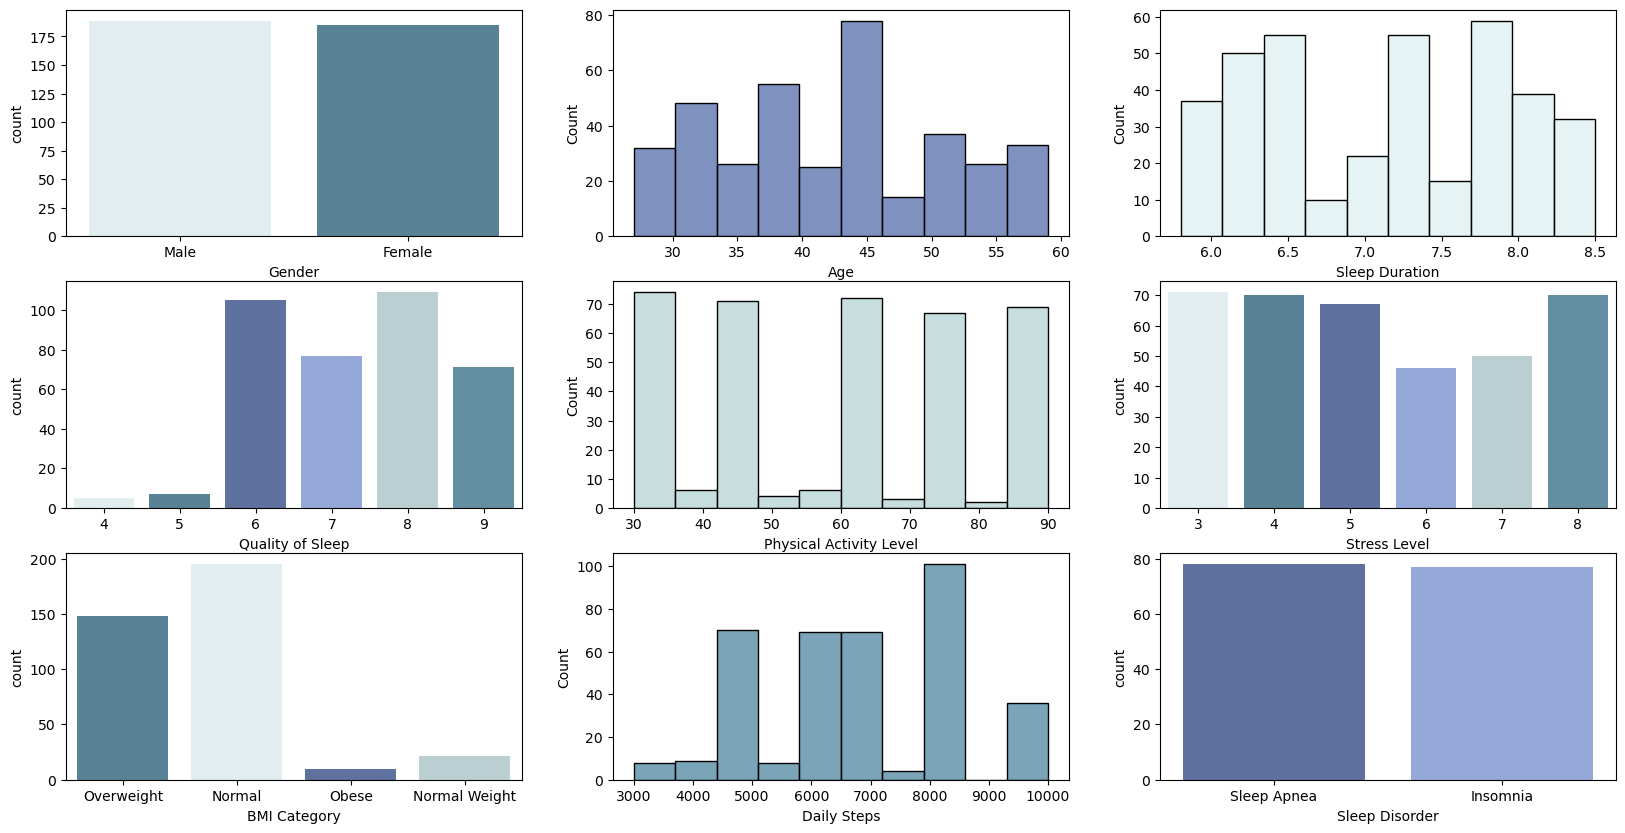

In [12]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0], palette={'Male': '#DEEFF2', 'Female': '#4E87A1'})
sns.histplot(x = 'Age', data = df, bins = 10, ax = ax[0,1], color = '#546CA9')
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10, color = '#DEEFF2')
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax [1,0], palette={4: '#DEEFF2', 5: '#4E87A1', 6: '#546CA9', 7: '#89A3E6', 8: '#B5D3D5', 9: '#5894AC'})
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10, color = '#B5D3D5')
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2], palette={3: '#DEEFF2', 4: '#4E87A1', 5: '#546CA9', 6: '#89A3E6', 7: '#B5D3D5', 8: '#5894AC'})
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0], palette = {'Overweight': '#4E87A1', 'Normal': '#DEEFF2', 'Obese': '#546CA9', 'Normal Weight': '#B5D3D5'})
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10, color = '#4E87A1')
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2], palette = {'None': '#4E87A1', 'Sleep Apnea':'#546CA9', 'Insomnia':'#89A3E6' })
